# Classifying with Logistic Regression

#### Description:

This codebook covers how to use standard linear regression techniques to make a prediction.

#### Skill level:

- Intermediate

### Import the required libraries
-------------------------

In [1]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

### Read data into a Pandas dataframe
-------------------------

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/boston.txt'))

### Check the shape and head of the dataframe
-------------------------

In [4]:
df_raw.shape

(506, 14)

In [5]:
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Create a new label for classification
-------------------------

In [6]:
df = df_raw

In [7]:
df['MDEV_bin'] = df['MDEV']

bin_cutoff = np.median(df['MDEV'])

df['MDEV_bin'] = df[['MDEV']].apply(lambda x: [0 if y < bin_cutoff else 1 for y in x])

In [8]:
df[['MDEV', 'MDEV_bin']].head()

,MDEV,MDEV_bin
0,24.0,1
1,21.6,1
2,34.7,1
3,33.4,1
4,36.2,1


### Separate features from the label
-------------------------

In [9]:
X = df.drop(['MDEV', 'MDEV_bin'], axis=1)

y_true = df[['MDEV_bin']].values

### Fit logistic regression model
-------------------------

In [10]:
clf = LogisticRegression(max_iter=10000)

clf.fit(X, y_true)

C:\Users\buswedg\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=10000)

### Check predictions against actuals
-------------------------

In [11]:
df_pred = df

In [12]:
y_pred = clf.predict(X)

df_pred['MDEV_bin_pred'] = y_pred

In [13]:
df_pred[['MDEV_bin', 'MDEV_bin_pred']].head()

,MDEV_bin,MDEV_bin_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


### Calculate ROC curve values
-------------------------

In [14]:
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
roc_auc = metrics.auc(fpr, tpr)

### Plot ROC curve
-------------------------

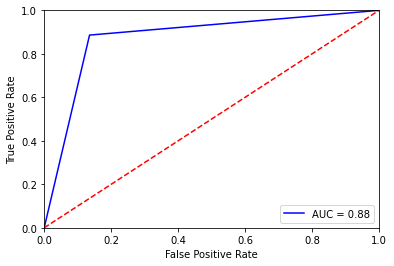

In [15]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.show()